#**Wind Efficiency Prediction Project**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounting drive

In [3]:
# import os
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Project files/wind data.csv")

In [5]:
df

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,2021-04-25 19:12:00,929.101908,948.441905,32.736076,1187.303192,83.187140,1343.320577,32.291391,35.152280,152.216446,191.088800,189.901812,7.155343,1.028960,Turbine_13,50.768675
909600,2021-02-20 17:37:00,100.730526,88.694599,30.540500,770.245593,56.235497,177.620552,30.434302,29.932141,85.353107,96.621675,93.417590,4.121607,0.595874,Turbine_158,44.234821
909601,2021-10-22 14:18:00,1120.915965,1165.016907,30.901129,1170.456860,62.942943,873.414622,30.491818,33.085164,42.820210,74.111173,230.988398,8.551669,0.951241,Turbine_15,46.942486
909602,2021-02-08 22:03:00,123.444564,116.066919,32.697933,770.190796,57.245207,95.865704,32.338824,31.525384,86.549094,97.470984,65.408801,4.324064,0.247335,Turbine_97,46.392221


**Features Details**

**timestamp:**

A date and time indicator for when the data was recorded. This is essential for time series analysis.


active_power_calculated_by_converter:



The active power output calculated by the converter, measured in watts. This indicates the real power being produced by the wind turbine.


active_power_raw:



The raw measurement of active power, also in watts. This might reflect the immediate power output from the turbine without any processing or adjustments.


ambient_temperature:



The ambient air temperature surrounding the turbine, measured in degrees Celsius. Temperature can affect wind turbine performance and efficiency.


generator_speed:



The rotational speed of the generator, usually measured in revolutions per minute (RPM). It can indicate how efficiently the turbine is converting wind energy into electrical energy.



generator_winding_temp_max:



The maximum temperature of the generator windings, measured in degrees Celsius. This is important for monitoring the health and efficiency of the generator.



grid_power10min_average:




The average power output to the grid over a 10-minute interval, measured in watts. This helps in understanding how the turbine is performing over short periods.


nc1_inside_temp:




The internal temperature of the nacelle (the housing that contains the generator and other components), measured in degrees Celsius. This can impact the operation and longevity of turbine components.



nacelle_temp:




The temperature within the nacelle, also in degrees Celsius. Similar to the above, it helps in assessing the thermal conditions affecting turbine
operations.



reactive_power_calculated_by_converter:




The reactive power output calculated by the converter, measured in VAR (Volt-Ampere Reactive). Reactive power is essential for voltage control in the power system.




reactive_power:






The raw measurement of reactive power, also in VAR. This reflects the power that oscillates between the source and load, affecting the voltage stability in the grid.






wind_direction_raw:






The direction of the wind relative to the turbine, measured in degrees. This information helps in optimizing the turbine’s orientation to capture wind energy efficiently.





wind_speed_raw:






The raw measurement of wind speed, usually in meters per second (m/s). This is a critical factor for assessing potential energy production.





wind_speed_turbulence:






A measure of wind speed variability, indicating how gusty the wind is. High turbulence can affect the stability and efficiency of the turbine.





turbine_id:






A unique identifier for each turbine in the dataset. This helps in tracking and analyzing data specific to individual turbines.





Target:






This column likely represents the target variable for prediction, such as the expected power output or other performance metrics related to the turbine's efficiency.
Each of these columns provides valuable insights into the operation a

In [6]:
df["turbine_id"].unique()

array(['Turbine_108', 'Turbine_18', 'Turbine_105', 'Turbine_15',
       'Turbine_01', 'Turbine_14', 'Turbine_10', 'Turbine_103',
       'Turbine_123', 'Turbine_120', 'Turbine_139', 'Turbine_97',
       'Turbine_19', 'Turbine_20', 'Turbine_13', 'Turbine_158'],
      dtype=object)

In [7]:
df["turbine_id"].nunique()


16

In [8]:
# EDA - Exploratory data analysis

In [9]:
#checking the datatypes of the each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               909604 non-null  object 
 1   active_power_calculated_by_converter    909604 non-null  float64
 2   active_power_raw                        909604 non-null  float64
 3   ambient_temperature                     909604 non-null  float64
 4   generator_speed                         909604 non-null  float64
 5   generator_winding_temp_max              909604 non-null  float64
 6   grid_power10min_average                 909604 non-null  float64
 7   nc1_inside_temp                         909604 non-null  float64
 8   nacelle_temp                            909604 non-null  float64
 9   reactice_power_calculated_by_converter  909604 non-null  float64
 10  reactive_power                          9096

In [10]:
df.drop(columns="timestamp",inplace=True)

In [11]:
df

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,929.101908,948.441905,32.736076,1187.303192,83.187140,1343.320577,32.291391,35.152280,152.216446,191.088800,189.901812,7.155343,1.028960,Turbine_13,50.768675
909600,100.730526,88.694599,30.540500,770.245593,56.235497,177.620552,30.434302,29.932141,85.353107,96.621675,93.417590,4.121607,0.595874,Turbine_158,44.234821
909601,1120.915965,1165.016907,30.901129,1170.456860,62.942943,873.414622,30.491818,33.085164,42.820210,74.111173,230.988398,8.551669,0.951241,Turbine_15,46.942486
909602,123.444564,116.066919,32.697933,770.190796,57.245207,95.865704,32.338824,31.525384,86.549094,97.470984,65.408801,4.324064,0.247335,Turbine_97,46.392221


In [12]:
df.isnull().sum()

,0
active_power_calculated_by_converter,0
active_power_raw,0
ambient_temperature,0
generator_speed,0
generator_winding_temp_max,0
grid_power10min_average,0
nc1_inside_temp,0
nacelle_temp,0
reactice_power_calculated_by_converter,0
reactive_power,0


In [13]:
df.duplicated().sum()

0

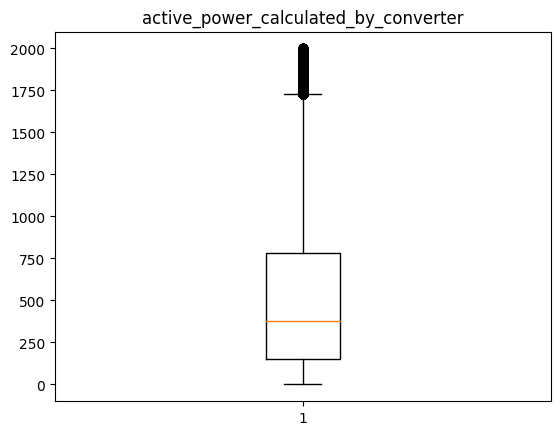

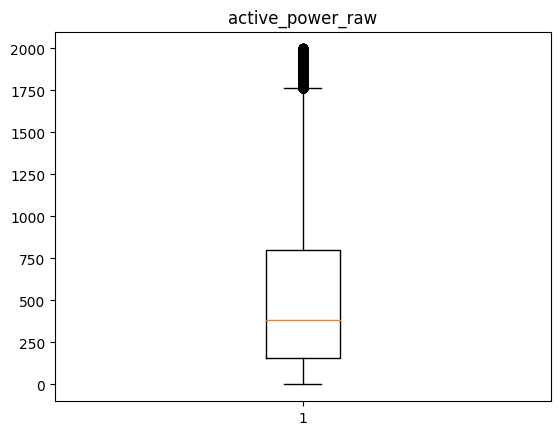

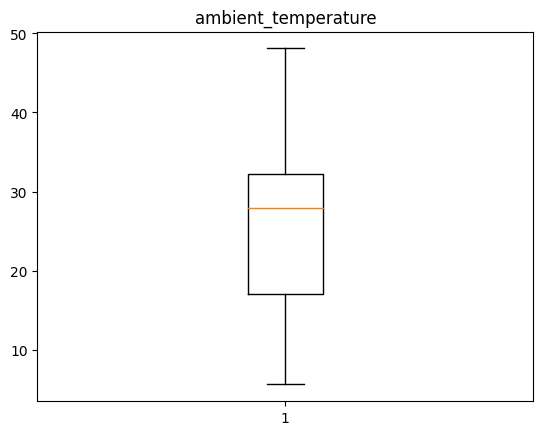

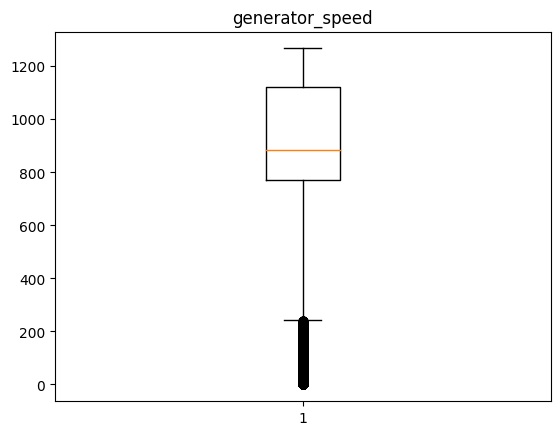

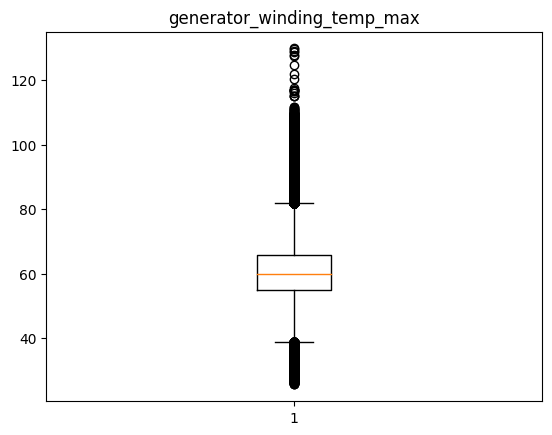

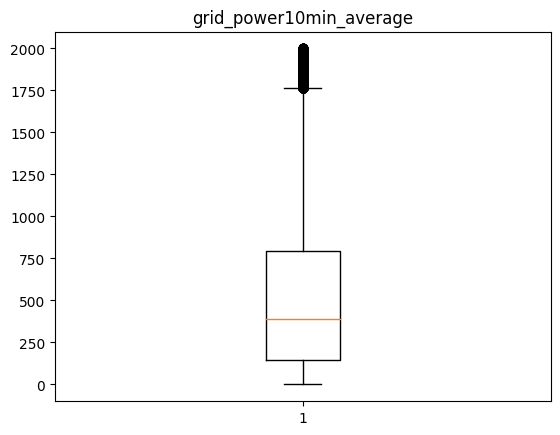

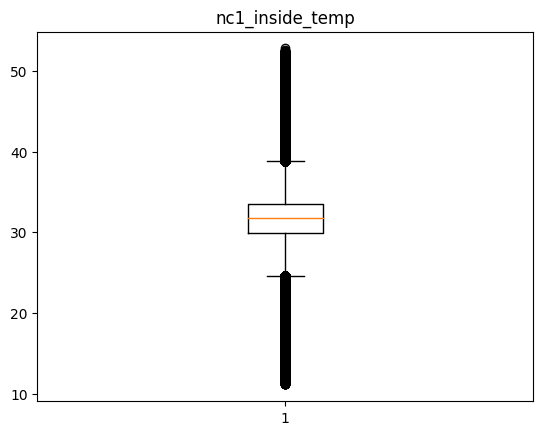

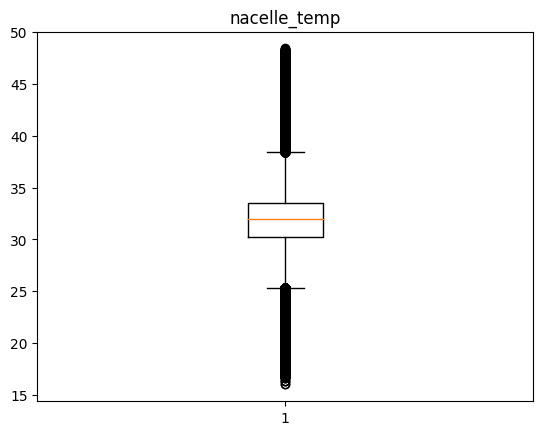

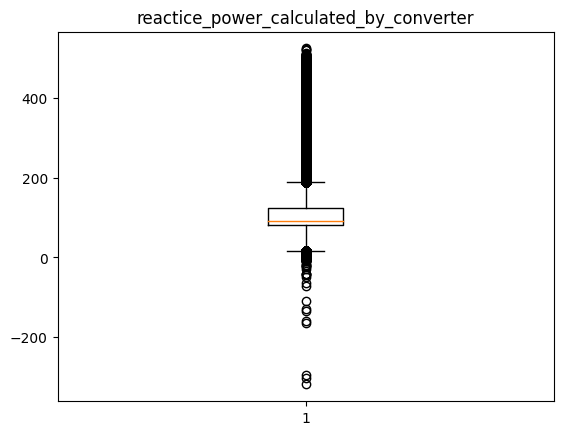

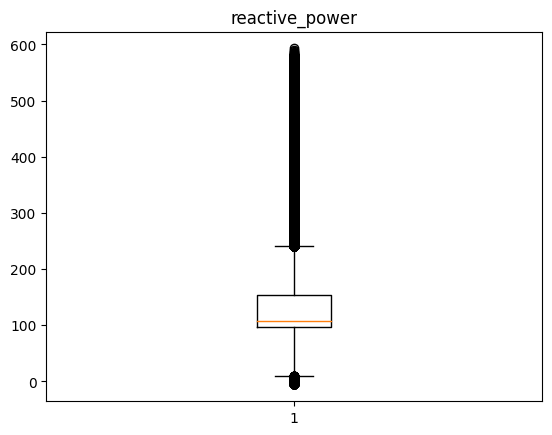

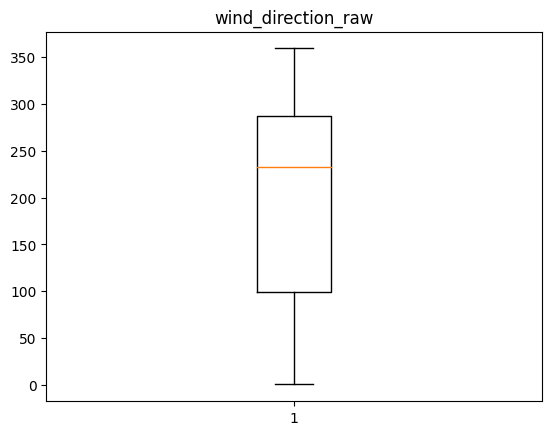

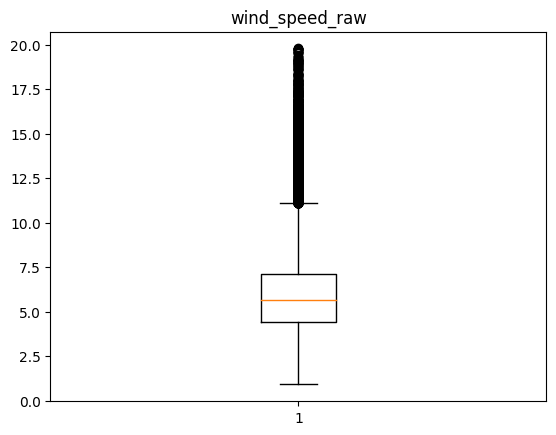

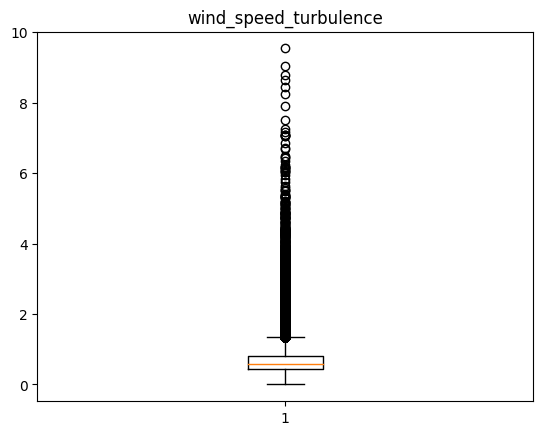

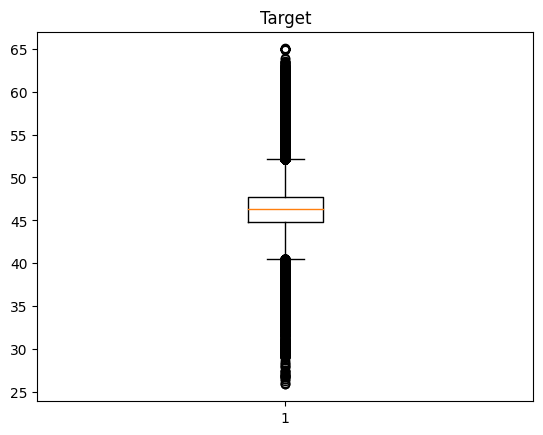

In [15]:
for col in df.columns:
  if df[col].dtype!="object":
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

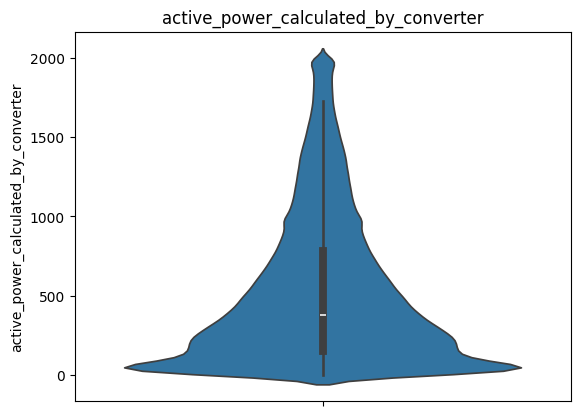

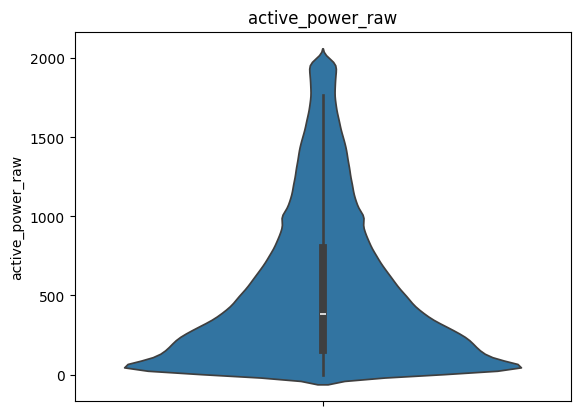

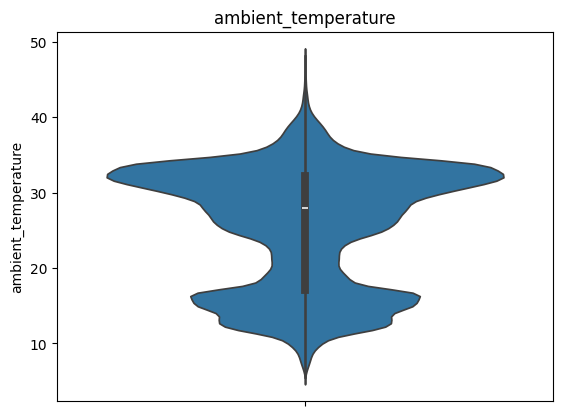

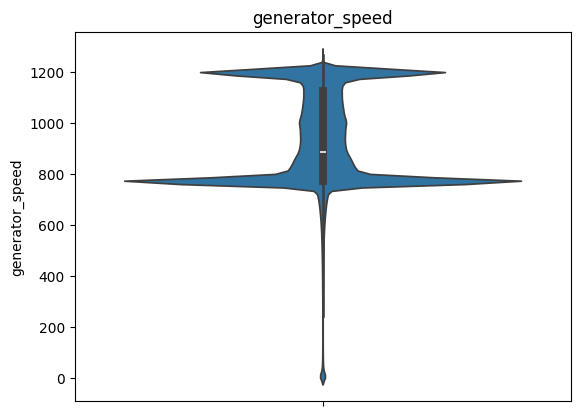

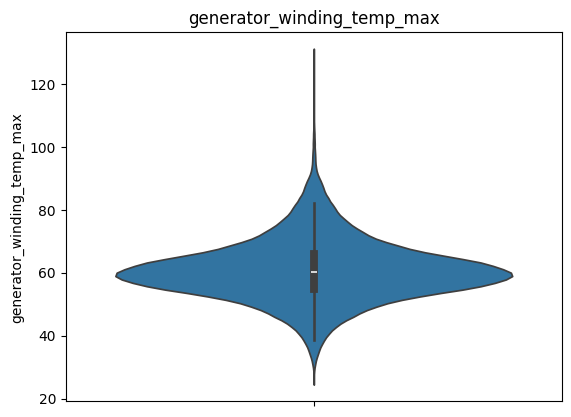

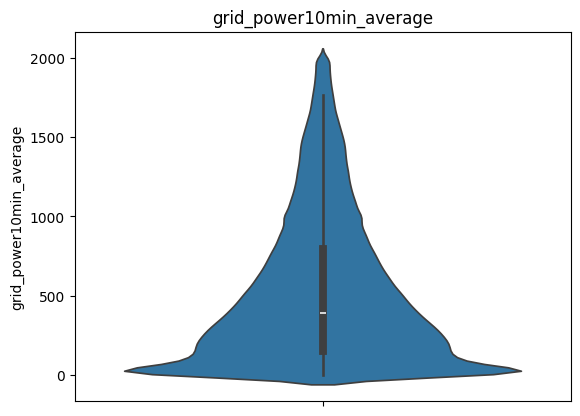

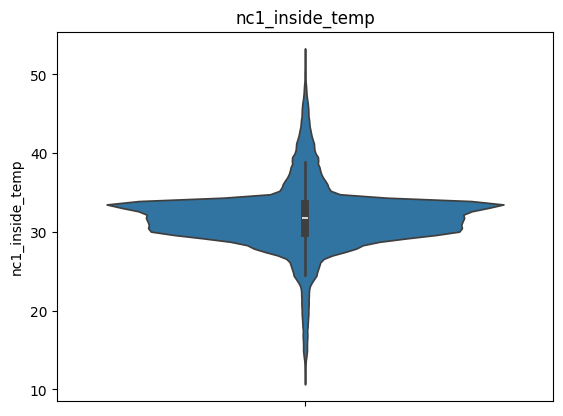

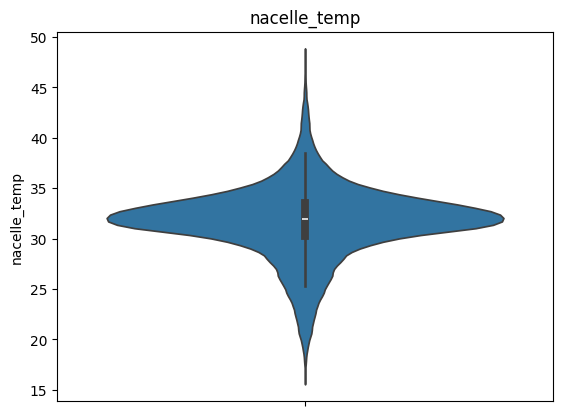

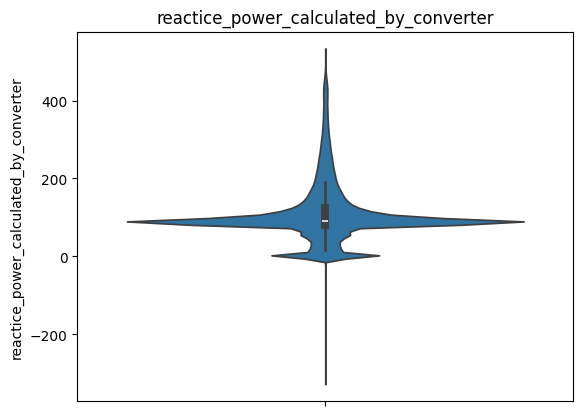

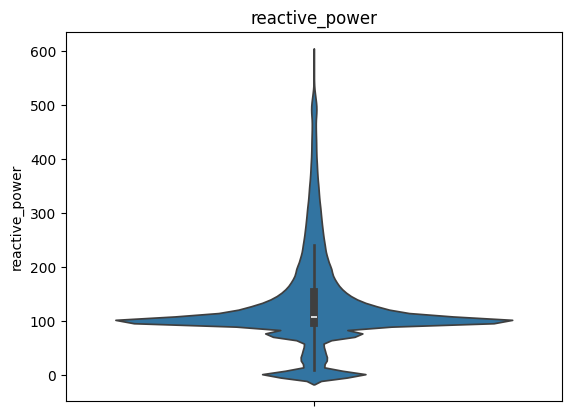

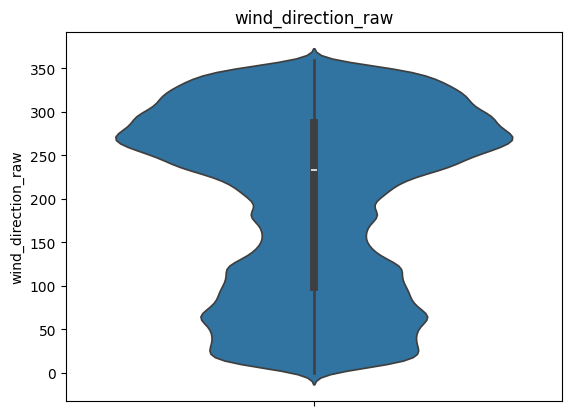

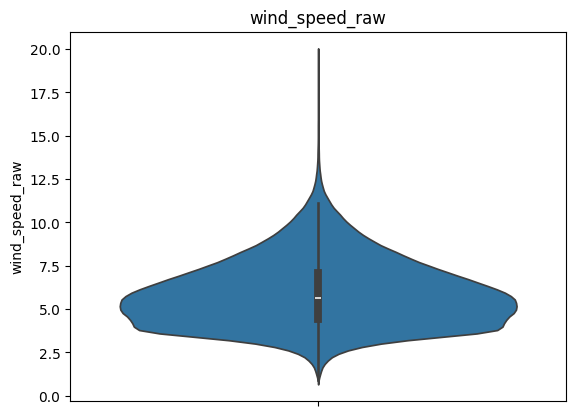

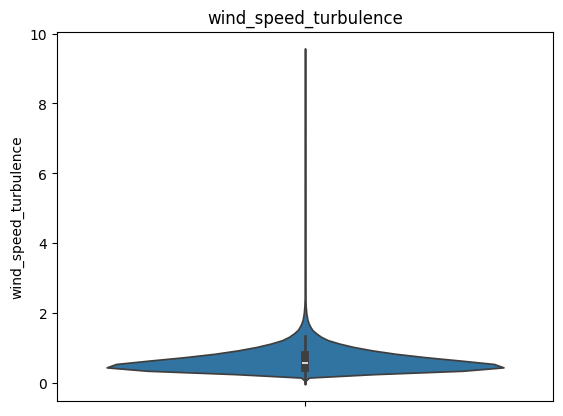

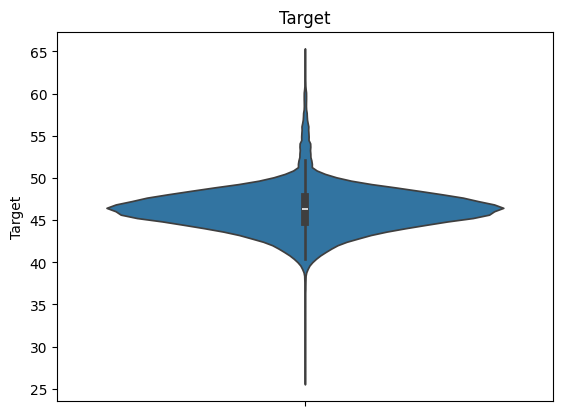

In [16]:
for col in df.columns:
  if df[col].dtype!="object":
    sns.violinplot(df[col])
    plt.title(col)
    plt.show()

In [19]:
# label  Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["turbine_id"]=le.fit_transform(df["turbine_id"])

In [20]:
df

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,4,47.582787
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,12,46.070328
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,3,39.989236
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,10,46.056587
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,0,54.346095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,929.101908,948.441905,32.736076,1187.303192,83.187140,1343.320577,32.291391,35.152280,152.216446,191.088800,189.901812,7.155343,1.028960,7,50.768675
909600,100.730526,88.694599,30.540500,770.245593,56.235497,177.620552,30.434302,29.932141,85.353107,96.621675,93.417590,4.121607,0.595874,11,44.234821
909601,1120.915965,1165.016907,30.901129,1170.456860,62.942943,873.414622,30.491818,33.085164,42.820210,74.111173,230.988398,8.551669,0.951241,10,46.942486
909602,123.444564,116.066919,32.697933,770.190796,57.245207,95.865704,32.338824,31.525384,86.549094,97.470984,65.408801,4.324064,0.247335,15,46.392221


**Feature Selection or Feature Extraction**


In [25]:
#Feature slection
# Correlation
#VIF
# RFE
#feature Extraction Techniques
# PCA
# LDA




In [26]:
df.corr()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
active_power_calculated_by_converter,1.000000,0.996435,-0.055748,0.865399,0.704785,0.951129,-0.048977,-0.114523,0.859807,0.890428,0.047813,0.933014,0.517178,0.029230,-0.041087
active_power_raw,0.996435,1.000000,-0.053158,0.854905,0.700618,0.950450,-0.048257,-0.112044,0.846891,0.880181,0.047419,0.931078,0.519473,0.028638,-0.040516
ambient_temperature,-0.055748,-0.053158,1.000000,-0.066242,0.090796,-0.062978,0.257850,0.365564,-0.078901,-0.083129,-0.015721,-0.088032,0.049475,0.003482,0.420487
generator_speed,0.865399,0.854905,-0.066242,1.000000,0.578988,0.830755,-0.063460,-0.157969,0.701424,0.726535,0.036872,0.829254,0.404138,0.034490,-0.042414
generator_winding_temp_max,0.704785,0.700618,0.090796,0.578988,1.000000,0.748013,0.056168,0.227567,0.666822,0.683035,0.096984,0.635969,0.452987,0.030526,0.295409
grid_power10min_average,0.951129,0.950450,-0.062978,0.830755,0.748013,1.000000,-0.057500,-0.134016,0.807921,0.840253,0.049098,0.893555,0.496686,0.029251,-0.049738
nc1_inside_temp,-0.048977,-0.048257,0.257850,-0.063460,0.056168,-0.057500,1.000000,0.691790,-0.042599,-0.048746,0.067772,-0.058853,0.069330,0.207090,0.201853
nacelle_temp,-0.114523,-0.112044,0.365564,-0.157969,0.227567,-0.134016,0.691790,1.000000,-0.088603,-0.098586,0.147899,-0.167366,0.164580,0.044271,0.508957
reactice_power_calculated_by_converter,0.859807,0.846891,-0.078901,0.701424,0.666822,0.807921,-0.042599,-0.088603,1.000000,0.993317,0.035202,0.790763,0.442172,-0.007785,-0.033477
reactive_power,0.890428,0.880181,-0.083129,0.726535,0.683035,0.840253,-0.048746,-0.098586,0.993317,1.000000,0.037892,0.827514,0.458801,-0.005434,-0.034994


<Axes: >

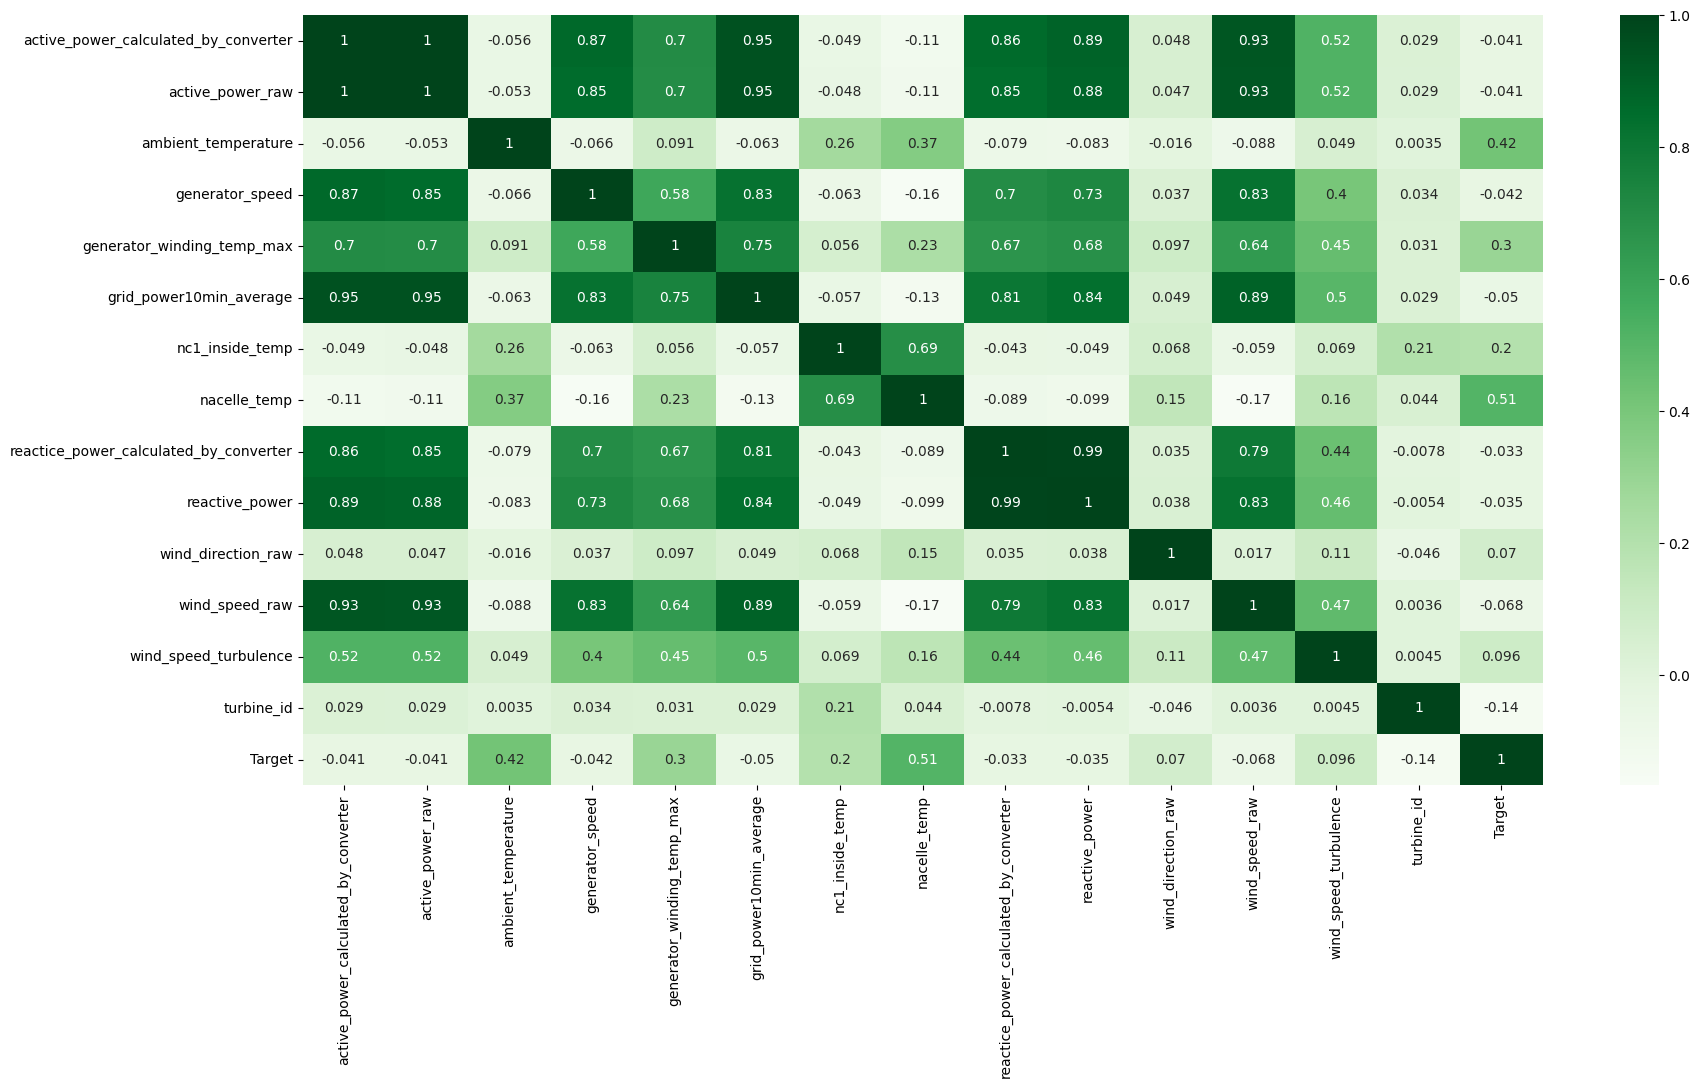

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

In [31]:
X=df.drop(["Target"],axis=1)  #independent feature
y=df["Target"]              #dependent

In [32]:
X

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,4
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,12
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,3
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,10
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,929.101908,948.441905,32.736076,1187.303192,83.187140,1343.320577,32.291391,35.152280,152.216446,191.088800,189.901812,7.155343,1.028960,7
909600,100.730526,88.694599,30.540500,770.245593,56.235497,177.620552,30.434302,29.932141,85.353107,96.621675,93.417590,4.121607,0.595874,11
909601,1120.915965,1165.016907,30.901129,1170.456860,62.942943,873.414622,30.491818,33.085164,42.820210,74.111173,230.988398,8.551669,0.951241,10
909602,123.444564,116.066919,32.697933,770.190796,57.245207,95.865704,32.338824,31.525384,86.549094,97.470984,65.408801,4.324064,0.247335,15


In [33]:
y

,Target
0,47.582787
1,46.070328
2,39.989236
3,46.056587
4,54.346095
...,...
909599,50.768675
909600,44.234821
909601,46.942486
909602,46.392221


In [34]:
#implementation of VIF to check with multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [35]:
# variance_inflation_factor(X.values,0)

398.83528185618377

In [41]:
vif=pd.DataFrame()
vif["Features"]=X.columns
vif["VIF_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif


,Features,VIF_values
0,active_power_calculated_by_converter,398.835282
1,active_power_raw,361.707780
2,ambient_temperature,13.149938
3,generator_speed,75.691505
4,generator_winding_temp_max,129.415671
5,grid_power10min_average,30.942860
6,nc1_inside_temp,151.622032
7,nacelle_temp,261.618960
8,reactice_power_calculated_by_converter,328.591273
9,reactive_power,427.091251


In [42]:
X.drop(columns="reactive_power",inplace=True)

In [43]:
vif=pd.DataFrame()
vif["Features"]=X.columns
vif["VIF_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif


,Features,VIF_values
0,active_power_calculated_by_converter,395.542659
1,active_power_raw,350.365694
2,ambient_temperature,13.119319
3,generator_speed,74.350309
4,generator_winding_temp_max,128.669949
5,grid_power10min_average,30.940445
6,nc1_inside_temp,151.622032
7,nacelle_temp,261.550467
8,reactice_power_calculated_by_converter,13.401599
9,wind_direction_raw,4.834229


In [44]:
X.drop(columns="active_power_calculated_by_converter",inplace=True)


In [45]:
vif=pd.DataFrame()
vif["Features"]=X.columns
vif["VIF_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif


,Features,VIF_values
0,active_power_raw,41.142661
1,ambient_temperature,13.117149
2,generator_speed,70.450184
3,generator_winding_temp_max,127.615265
4,grid_power10min_average,30.251731
5,nc1_inside_temp,150.966206
6,nacelle_temp,261.287031
7,reactice_power_calculated_by_converter,11.501179
8,wind_direction_raw,4.834129
9,wind_speed_raw,70.214395


In [46]:
X.drop(columns="nacelle_temp",inplace=True)


In [47]:
vif=pd.DataFrame()
vif["Features"]=X.columns
vif["VIF_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif


,Features,VIF_values
0,active_power_raw,40.499238
1,ambient_temperature,12.693386
2,generator_speed,70.230261
3,generator_winding_temp_max,76.663090
4,grid_power10min_average,26.482723
5,nc1_inside_temp,60.991280
6,reactice_power_calculated_by_converter,11.383959
7,wind_direction_raw,4.772817
8,wind_speed_raw,69.408941
9,wind_speed_turbulence,7.483043


In [48]:
X.drop(columns="generator_winding_temp_max",inplace=True)


In [49]:
vif=pd.DataFrame()
vif["Features"]=X.columns
vif["VIF_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif


,Features,VIF_values
0,active_power_raw,36.633377
1,ambient_temperature,11.975772
2,generator_speed,64.670462
3,grid_power10min_average,23.626473
4,nc1_inside_temp,50.827796
5,reactice_power_calculated_by_converter,10.665043
6,wind_direction_raw,4.687053
7,wind_speed_raw,67.918602
8,wind_speed_turbulence,7.303945
9,turbine_id,3.935170


In [51]:
X.drop(columns="wind_speed_raw",inplace=True)


In [52]:
vif=pd.DataFrame()
vif["Features"]=X.columns
vif["VIF_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif


,Features,VIF_values
0,active_power_raw,31.157480
1,ambient_temperature,11.950610
2,generator_speed,49.218489
3,grid_power10min_average,23.591454
4,nc1_inside_temp,46.200059
5,reactice_power_calculated_by_converter,10.619252
6,wind_direction_raw,4.681371
7,wind_speed_turbulence,7.296754
8,turbine_id,3.916813


In [54]:
X.drop(columns="generator_speed",inplace=True)


In [55]:
vif=pd.DataFrame()
vif["Features"]=X.columns
vif["VIF_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif


,Features,VIF_values
0,active_power_raw,29.163670
1,ambient_temperature,11.865525
2,grid_power10min_average,23.244622
3,nc1_inside_temp,23.135829
4,reactice_power_calculated_by_converter,10.615597
5,wind_direction_raw,4.631477
6,wind_speed_turbulence,7.295441
7,turbine_id,3.914612


In [56]:
X.drop(columns="active_power_raw",inplace=True)


In [57]:
vif=pd.DataFrame()
vif["Features"]=X.columns
vif["VIF_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif


,Features,VIF_values
0,ambient_temperature,11.858330
1,grid_power10min_average,7.025965
2,nc1_inside_temp,22.808825
3,reactice_power_calculated_by_converter,8.714076
4,wind_direction_raw,4.630341
5,wind_speed_turbulence,7.130989
6,turbine_id,3.910929


In [58]:
X.drop(columns="nc1_inside_temp",inplace=True)


In [59]:
vif=pd.DataFrame()
vif["Features"]=X.columns
vif["VIF_values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif


,Features,VIF_values
0,ambient_temperature,6.068542
1,grid_power10min_average,6.892300
2,reactice_power_calculated_by_converter,8.365314
3,wind_direction_raw,3.964739
4,wind_speed_turbulence,6.664746
5,turbine_id,3.202921


In [60]:
X

,ambient_temperature,grid_power10min_average,reactice_power_calculated_by_converter,wind_direction_raw,wind_speed_turbulence,turbine_id
0,31.694380,917.897085,141.457644,280.864782,0.544082,4
1,12.894948,445.554250,89.186457,299.552460,0.469031,12
2,16.648388,1364.716003,230.622309,84.960106,0.622318,3
3,28.388141,14.324897,66.211015,87.261119,0.760719,10
4,31.519527,599.020172,137.163938,313.724818,0.346068,0
...,...,...,...,...,...,...
909599,32.736076,1343.320577,152.216446,189.901812,1.028960,7
909600,30.540500,177.620552,85.353107,93.417590,0.595874,11
909601,30.901129,873.414622,42.820210,230.988398,0.951241,10
909602,32.697933,95.865704,86.549094,65.408801,0.247335,15


In [61]:
y

,Target
0,47.582787
1,46.070328
2,39.989236
3,46.056587
4,54.346095
...,...
909599,50.768675
909600,44.234821
909601,46.942486
909602,46.392221


In [62]:
#model Implementation

In [63]:
#splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [66]:
lr.fit(X_train,y_train)  #Training

LinearRegression()

In [67]:
lr_pred=lr.predict(X_test)
lr_pred

array([44.80746049, 46.41187754, 45.9383891 , ..., 45.24405885,
       44.62516847, 45.75913208])

In [68]:
y_test

,Target
426694,48.591511
905999,48.263920
771887,43.726114
46228,43.581381
415224,52.543697
...,...
651822,46.780514
854085,50.099350
286421,45.009113
149029,45.122433


In [70]:
from sklearn.metrics import *

In [71]:
r2_score(y_test,lr_pred)

0.21067665825108006

# Decison Tree

In [72]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)


DecisionTreeRegressor()

In [73]:
dt_pred=dt.predict(X_test)
dt_pred

array([47.70661163, 47.30853653, 36.7263546 , ..., 44.52137211,
       45.25435384, 48.58720843])

In [74]:
r2_score(y_test,dt_pred)

0.37724671229909046

# Random Forest Model

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [77]:
rf_pred=rf.predict(X_test)
rf_pred

array([48.15088522, 48.10284607, 39.75842302, ..., 44.84570021,
       45.27378858, 48.05199404])

In [78]:
r2_score(y_test,rf_pred)

0.6826977783061401